In [1]:
install.packages("BiocManager")
library(BiocManager)
BiocManager::install("DESeq2")
library(DESeq2) 
library(magrittr)

Installing package into 'C:/Users/Sophia Schmidt/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'BiocManager' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sophia Schmidt\AppData\Local\Temp\RtmpysijdB\downloaded_packages


Bioconductor version 3.9 (BiocManager 1.30.9), ?BiocManager::install for help
Bioconductor version 3.9 (BiocManager 1.30.9), R 3.6.1 (2019-07-05)
Installing package(s) 'DESeq2'


package 'DESeq2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sophia Schmidt\AppData\Local\Temp\RtmpysijdB\downloaded_packages


Old packages: 'digest', 'rlang', 'cluster', 'data.table', 'dplyr', 'foreign',
  'mgcv', 'purrr'
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    un

In [3]:
DESeq2::version()

ERROR: Error: 'version' is not an exported object from 'namespace:DESeq2'


In [13]:
avail <- BiocManager::available()

In [14]:
length(avail) 

[1] 18201

In [21]:
read_counts=read.table("C:\\Users\\Sophia Schmidt\\Documents\\Uni\\Master\\Programming for Life Science\\raw_countstdl.txt")
head(read_counts, n=5)

,ctl1,ctl2,ctl3,ctl4,treat1,treat2,treat3,treat4
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0


In [7]:
row.names(read_counts) <- read_counts$Geneid

In [19]:
# I did not get that one (?)
#read_counts <- read_counts[, -c(1:6)]
#head(read_counts, n=5)

,treat3,treat4
,<int>,<int>
ENSMUSG00000102693,0,0
ENSMUSG00000064842,0,0
ENSMUSG00000051951,1,24
ENSMUSG00000102851,0,0
ENSMUSG00000103377,0,0


In [25]:
sample_info <- data.frame(condition=rep(c("control","treatment"), each=4),row.names=names(read_counts))
sample_info

,condition
,<fct>
ctl1,control
ctl2,control
ctl3,control
ctl4,control
treat1,treatment
treat2,treatment
treat3,treatment
treat4,treatment


In [26]:
DESeq.ds <- DESeqDataSetFromMatrix(countData = read_counts,
                                      colData = sample_info,
                                      design = ~condition)
head(DESeq.ds)

class: DESeqDataSet 
dim: 6 8 
metadata(1): version
assays(1): counts
rownames(6): ENSMUSG00000102693 ENSMUSG00000064842 ...
  ENSMUSG00000103377 ENSMUSG00000104017
rowData names(0):
colnames(8): ctl1 ctl2 ... treat3 treat4
colData names(1): condition

In [27]:
# Check the DESeqDataSet
colData(DESeq.ds) %>% head
assay(DESeq.ds) %>% head
rowRanges(DESeq.ds) %>% head

DataFrame with 6 rows and 1 column
       condition
        <factor>
ctl1     control
ctl2     control
ctl3     control
ctl4     control
treat1 treatment
treat2 treatment

,ctl1,ctl2,ctl3,ctl4,treat1,treat2,treat3,treat4
ENSMUSG00000102693,0,0,0,0,0,0,0,0
ENSMUSG00000064842,0,0,0,0,1,0,0,0
ENSMUSG00000051951,2,0,1,1,11,2,1,24
ENSMUSG00000102851,0,0,0,0,0,0,0,0
ENSMUSG00000103377,0,0,0,0,0,0,0,0
ENSMUSG00000104017,0,0,0,0,0,0,0,0


GRangesList object of length 6:
$ENSMUSG00000102693 
GRanges object with 0 ranges and 0 metadata columns:
   seqnames    ranges strand
      <Rle> <IRanges>  <Rle>

$ENSMUSG00000064842 
GRanges object with 0 ranges and 0 metadata columns:
     seqnames ranges strand

$ENSMUSG00000051951 
GRanges object with 0 ranges and 0 metadata columns:
     seqnames ranges strand

...
<3 more elements>
-------
seqinfo: no sequences

In [28]:
# Remove the genes without any counts
DESeq.ds <- DESeq.ds[rowSums(counts(DESeq.ds)) > 0,]

In [29]:
# Normalize the count reads with size factor
DESeq.ds <- estimateSizeFactors(DESeq.ds)
sizeFactors(DESeq.ds)
norm_counts <- counts(DESeq.ds, normalized = TRUE)

ctl1      ctl2      ctl3      ctl4    treat1    treat2    treat3    treat4 
0.8613852 0.7601755 0.8089857 0.8337696 0.9487156 0.8192834 0.9787590 4.0539751

In [30]:
# Transform normalized read counts to log2 scale using a pseudocount of 1
log.norm.counts <- log2(norm_counts + 1)

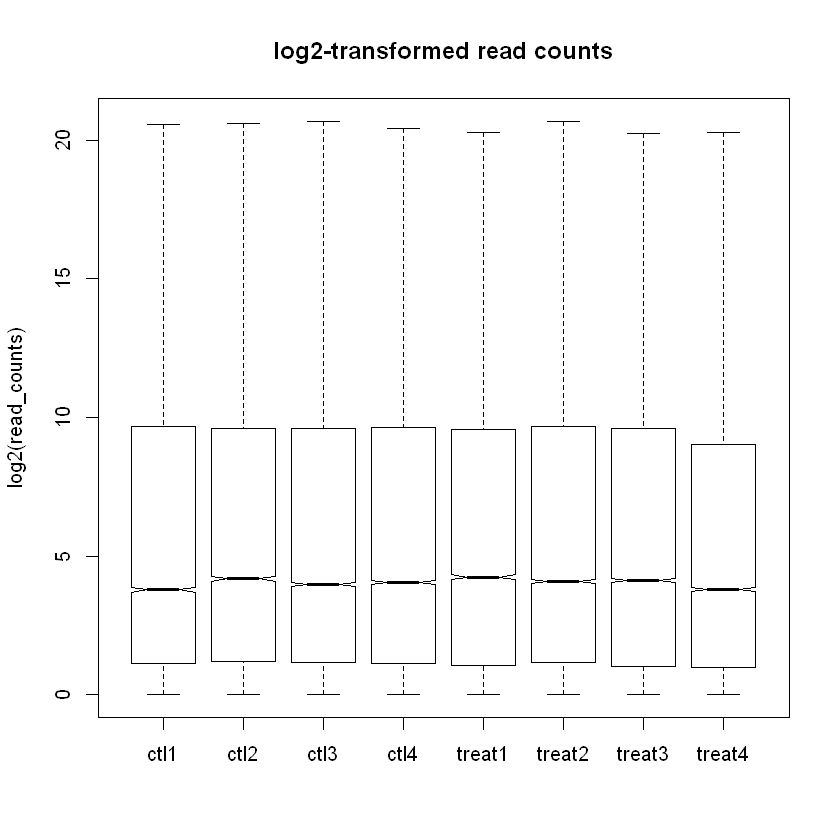

In [31]:
# Generate a boxplot of log2-transformed read counts
boxplot(log.norm.counts, notch = TRUE ,
             main = "log2-transformed read counts",
              ylab = "log2(read_counts)")